[[4.999975e-06 4.999975e-06 4.999975e-06 4.999975e-06]]


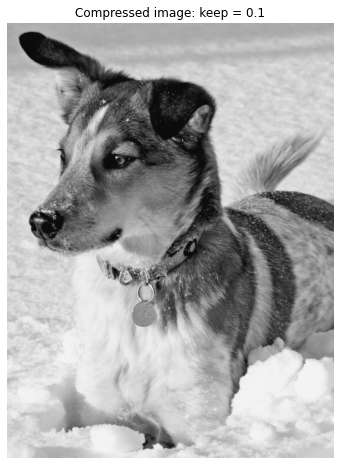

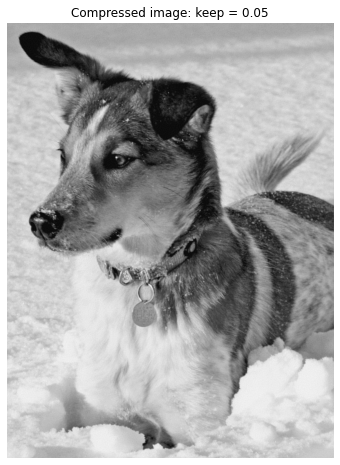

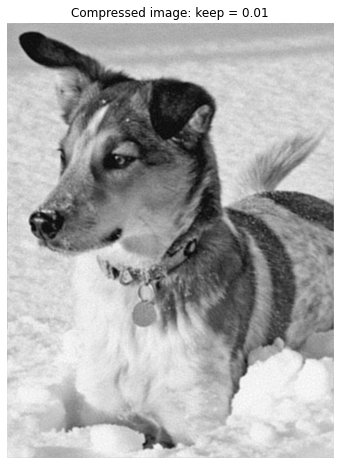

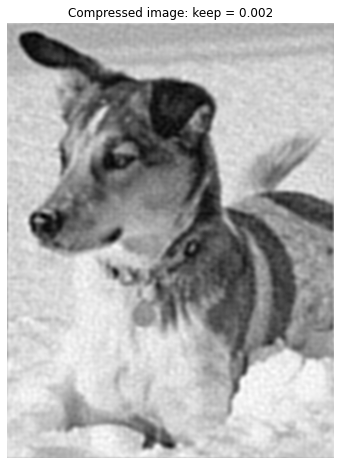

In [32]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('dog.jpg'))
A = np.mean(A, -1); # Convert RGB to grayscale


At = np.fft.fft2(A)
Atsort = np.sort(np.abs(At.reshape(-1))) # sort by magnitude
compression_ratio = np.zeros((1,4)) 
j=0
# Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Atsort[int(np.floor((1-keep)*len(Atsort)))]
    ind = np.abs(At)>thresh          # Find small indices
    Atlow = At * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    #compressed ratio
    image_size = sys.getsizeof(A)
    compressed_size = sys.getsizeof(Alow)
    compression_ratio[:,j]= (compressed_size)/(image_size)
    j += 1
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep))
 

print(compression_ratio)